In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import spikeinterface as si
import matplotlib.pyplot as plt
import os
from matplotlib.backends.backend_pdf import PdfPages
import umap

In [2]:
trend_neuron = ['Neuron_11', "Neuron_15", 'Neuron_17', 'Neuron_18', 'Neuron_19', 'Neuron_20', "Neuron_24", 'Neuron_25']

In [3]:
mean_spike_rate = pd.read_csv("/media/ubuntu/sda/data/mouse6/output/03_single_neuron/mean_spike_rate.csv").iloc[:, 1:]

In [4]:
Image_score = pd.DataFrame()
with PdfPages("reduced_dim_Neuron_trend.pdf") as pdf:
    for neuron in trend_neuron:
        temp = mean_spike_rate[mean_spike_rate['Neuron'] == neuron]
        slope, intercept = np.polyfit(temp['PC_1'], temp['PC_2'], 1)
        y_fit = (temp['PC_1'] * slope + intercept).tolist()

        Image_score = pd.concat((Image_score, pd.DataFrame(y_fit)), axis=1)
        plt.figure(figsize=(5, 5))
        sns.scatterplot(x = temp['PC_1'], y = temp['PC_2'], s=16, hue = temp['image'])
        plt.plot(temp['PC_1'], y_fit, color='red')
        plt.xlabel('PC_1')
        plt.ylabel('PC_2')
        plt.xticks([])
        plt.yticks([])
        plt.title(neuron)
        pdf.savefig()
        plt.close()
Image_score.columns = trend_neuron
Image_score.index = range(1, 118)

In [3]:
import umap
image_reducer = umap.UMAP()
embedding = image_reducer.fit_transform(Image_score)

from sklearn.cluster import DBSCAN
eps = 0.53
min_samples = 1

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(embedding)
dbscan.labels_

NameError: name 'Image_score' is not defined

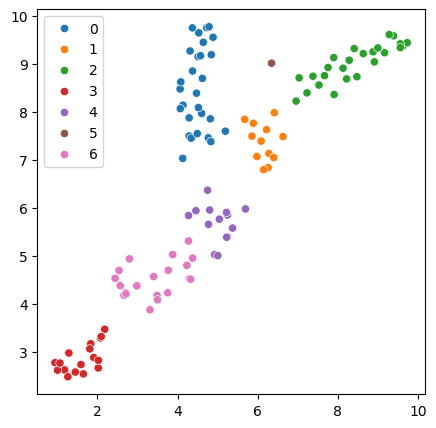

In [10]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x = embedding[:, 0],
                y = embedding[:, 1],
                hue = dbscan.labels_.astype(str))
plt.show()

In [ ]:
image_inf = pd.DataFrame()
image_inf['Image'] = [i for i in range(1, 118)]
image_inf = pd.concat((image_inf, pd.DataFrame(embedding, columns= ['UMAP_1', 'UMAP_2']), pd.DataFrame(dbscan.labels_, columns=['label'])), axis = 1)